### Grid Search
<small>

-  a hyperparameter optimization technique that evaluates all possible combinations of specified hyperparameter values to find the best-performing model configuration.

<br>

<b>How it works: </b>
1. defines a grid of hyperparameter values

2. trains and evaluates the model for every combination using cross-validation

3. selects the best combination based on performance metrics

<br>

<b>Limitations: </b>
- computational expensive

- fixed search space

<br>

<b>Alternatives:</b>
- random search: tests random combinations to save time

- bayesian optimization: uses probabilistic models to optimize hyperparameters more efficiently

</small>

Importing the libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [32]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Kernel SVM model on the Training set

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

Making the Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

Applying k-Fold Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print("Accuracies are: ")
for i in range(0, 10):
    print(accuracies[i])
print()

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))

print('Accuracy: {:.2f} %'.format(accuracies.std()*100))

Accuracies are: 
0.8
0.9666666666666667
0.8
0.9666666666666667
0.8666666666666667
0.8666666666666667
0.9
0.9333333333333333
1.0
0.9333333333333333

Accuracy: 90.33 %
Accuracy: 6.57 %


Applying Grid Search to find the best model and the best parameters

<small>
It's only used in training set

<br>
<br>

---
<b>C</b> is a hyperparameter for SVMs that controls the trade-off between model complexity and misclassification tolerance:
- Low C (e.g., 0.25): Allows more misclassifications for a wider margin, reducing overfitting.

- High C (e.g., 1): Focuses on minimizing misclassification, which may lead to overfitting.
---

<br>

<b>n_jobs = N</b> <br>
In scikit-learn it used to specify the number of CPU cores to be used for parallel computation during certain operations

- N = -1 --> Uses all available CPU cores for parallel processing.
- N = 1 --> Uses a single CPU core (no parallelization).
- N > 1 --> Uses N CPU cores for parallel processing, where N is a positive integer.

</small>

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = [
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
    ]

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
    )


grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters: ", best_parameters)

# after checking result: best accuracy (99.67%) > default accuracy (99.3%)

Best Accuracy: 90.67 %
Best Parameters:  {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


Visualizing the Training set results

C:\Users\HP\AppData\Local\Temp\ipykernel_8316\436204521.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


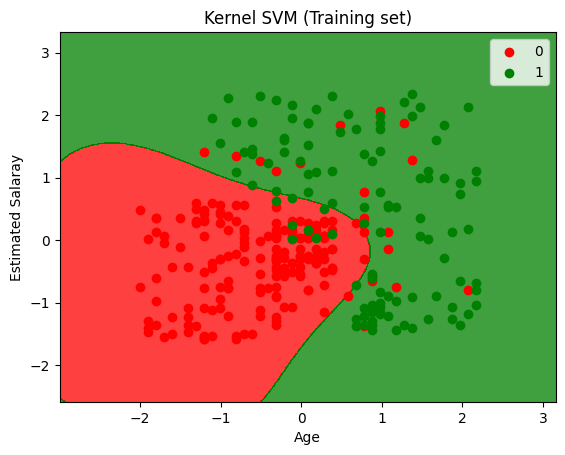

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
    np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
    )

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set ==j, 0],
        X_set[y_set == j, 1], 
        c = ListedColormap(('red', 'green', 'blue'))(i), label=j
        )

plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salaray')
plt.legend()
plt.show()

Visualizing the Test set results

C:\Users\HP\AppData\Local\Temp\ipykernel_8316\3245912992.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


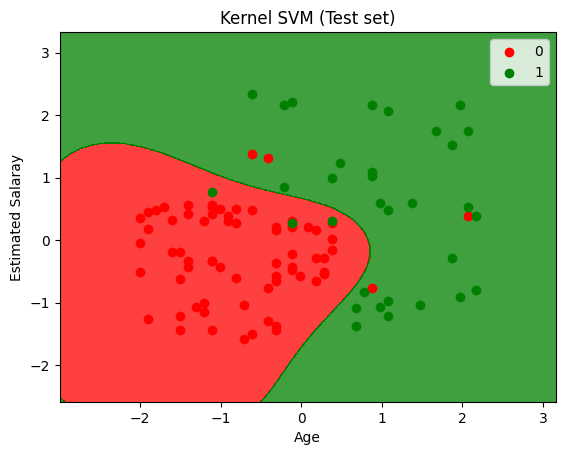

In [40]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
    np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
    )

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set ==j, 0],
        X_set[y_set == j, 1], 
        c = ListedColormap(('red', 'green', 'blue'))(i), label=j
        )

plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salaray')
plt.legend()
plt.show()